## MOEA/D


This algorithm is implemented based on <cite data-cite="moead"></cite>. 

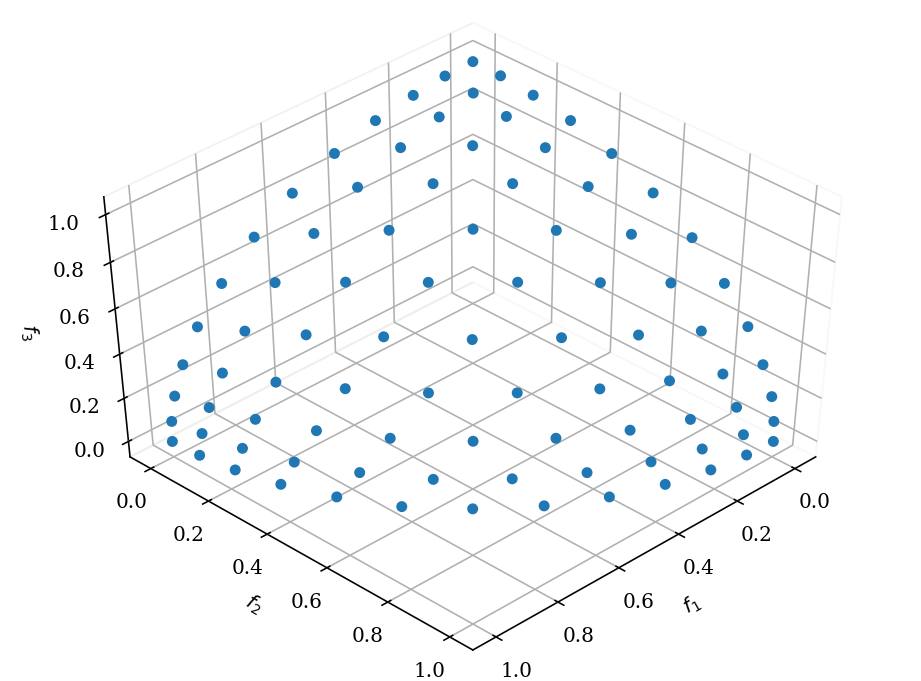

In [1]:
from pymoo.algorithms.moead import MOEAD
from pymoo.factory import get_problem, get_visualization, get_reference_directions
from pymoo.optimize import minimize

problem = get_problem("dtlz2")

algorithm = MOEAD(
    get_reference_directions("das-dennis", 3, n_partitions=12),
    n_neighbors=15,
    decomposition="pbi",
    prob_neighbor_mating=0.7,
    seed=1
)

res = minimize(problem, algorithm, termination=('n_gen', 200))

get_visualization("scatter").add(res.F).show()


### API